# Dataset
  https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [229]:
# import some packages I need it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [230]:
# load data
df = pd.read_csv('Car details v3.csv')

# EDA For Car details V3

In [231]:
#show the first rows in dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [232]:
#show some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [233]:
#show null values in dataset
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [234]:
# remove unit from values and create new colum with name contain unit   
df['engine_CC'] = df['engine'].str.split(" ",n=1, expand= True)[0]

In [235]:
df.engine

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [236]:
df['engine_CC']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine_CC, Length: 8128, dtype: object

In [237]:
# remove unit from values and create new colum with name contain unit  
df['mileage_Kmpl'] = df['mileage'].str.split(" ",n=1, expand= True)[0]

In [238]:
kmkg = 0
kmpl = 0
for i in df.mileage:
    if str(i).endswith('km/kg'):
        kmkg +=1
    else:
        kmpl +=1
        
print('number of Km/Kg is {}'.format(kmkg))
print('number of Kmpl is {}'.format(kmpl))
print('percentage of km/Kg is {}'.format((kmkg/kmpl)*100))

number of Km/Kg is 88
number of Kmpl is 8040
percentage of km/Kg is 1.0945273631840797


In [239]:
# remove unit from values and create new colum with name contain unit  
df['max_power_bnb'] = df['max_power'].str.split(" ",n=1, expand= True)[0]

In [240]:
df['max_power_bnb']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power_bnb, Length: 8128, dtype: object

In [241]:
# drop unuseful columns
df.drop(['torque', 'name', 'max_power', 'mileage', 'engine'], axis=1, inplace=True)

In [242]:
# convert owner data type into integer 
df.owner.replace({'Test Drive Car':0 ,'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4},inplace=True)

In [243]:
#Replace null value with mean 
avg_mileage_Kmpl = df['mileage_Kmpl'].astype('float').mean(axis=0)
df['mileage_Kmpl'].replace(np.nan, avg_mileage_Kmpl,inplace=True)

# convert df3['max_power_bnb'] to float type
df['mileage_Kmpl'] = df['mileage_Kmpl'].astype('float')
print(df['mileage_Kmpl'].dtype)

float64


In [244]:
#fill nulls values with mode
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

#convert seats into int type 
df['seats'] = df['seats'].astype('int')

#check type of seats
print(df['seats'].dtype)

int32


In [245]:
#fill null with mode
df['engine_CC'].replace(np.nan, df['engine_CC'].mode()[0],inplace=True)

#convert type to int
df['engine_CC'] = df['engine_CC'].astype('int')
#check type of engine
print(df['engine_CC'].dtype)

int32


In [246]:
#Replace null value with mean 
df['max_power_bnb'].replace('', np.nan,inplace=True)
avg_max_power_bnb = df['max_power_bnb'].astype('float').mean(axis=0)
df['max_power_bnb'].replace(np.nan, avg_max_power_bnb,inplace=True)

# convert df3['max_power_bnb'] to float type
df['max_power_bnb'] = df['max_power_bnb'].astype('float')
print(df['max_power_bnb'].dtype)

float64


In [247]:
df.describe()

,year,selling_price,km_driven,owner,seats,engine_CC,mileage_Kmpl,max_power_bnb
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1.459154,5.405389,1452.89813,19.418783,91.517919
std,4.044249,8.062534e+05,5.655055e+04,0.717381,0.948874,498.19672,3.981875,35.343246
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,2.000000,624.00000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1.000000,5.000000,1197.00000,16.800000,68.100000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,5.000000,1248.00000,19.418783,83.100000
75%,2017.000000,6.750000e+05,9.800000e+04,2.000000,5.000000,1582.00000,22.277500,101.250000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,14.000000,3604.00000,42.000000,400.000000


In [248]:
#normalize seats column
df['seats']= df['seats'] /df['seats'].max()

In [249]:
#normalize km_driven column
df['km_driven'] = df['km_driven'] /df['km_driven'].max()

In [250]:
#normalize mileage_Kmpl column
df['mileage_Kmpl'] = df['mileage_Kmpl'] /df['mileage_Kmpl'].max()

In [251]:
#normailze owner column
df['owner'] = (df['owner'] /df['owner'].max())

In [252]:
#normailze engine_CC column
df['engine_CC'] = df['engine_CC'] /df['engine_CC'].max()

In [253]:
#normailze max_power_bnb column
df['max_power_bnb'] = df['max_power_bnb'] /df['max_power_bnb'].max()

## Binning

Text(0.5, 1.0, 'Max Power Bins')

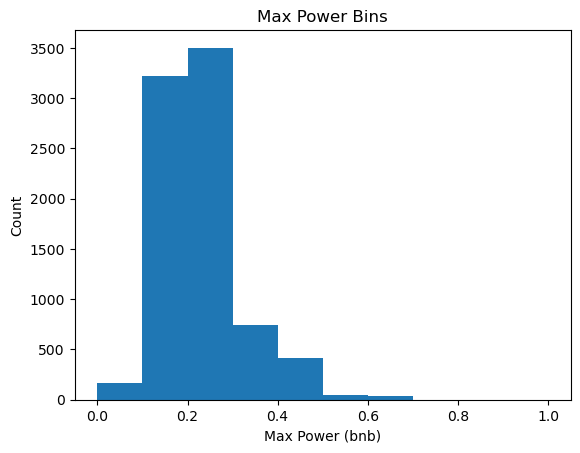

In [254]:
# plot Max power
plt.hist(df['max_power_bnb'])

#set labels
plt.xlabel('Max Power (bnb)')
plt.ylabel('Count')
plt.title('Max Power Bins')

Text(0.5, 1.0, 'Max Power Bins')

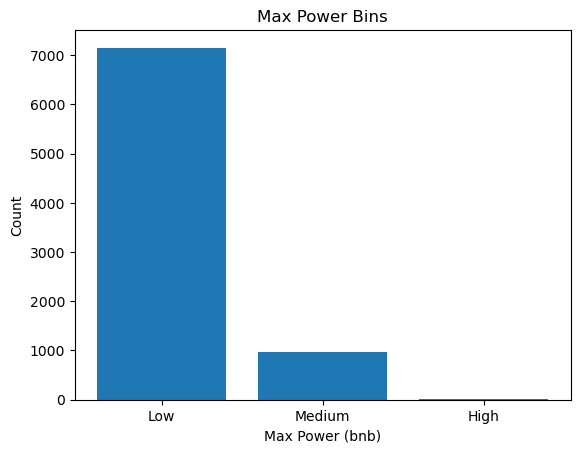

In [255]:
bins =  np.linspace(min(df['max_power_bnb']), max(df['max_power_bnb']),4)

group_names = ['Low', 'Medium' , 'High']

df['max_power_binned'] = pd.cut(df['max_power_bnb'], bins, labels=group_names, include_lowest=True)

plt.bar(group_names, df['max_power_binned'].value_counts())

#set labels
plt.xlabel('Max Power (bnb)')
plt.ylabel('Count')
plt.title('Max Power Bins')

# Analyzing individual Feature Patterns Using Visualization

In [256]:
#show corrolation between continues values
df.corr()

C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_7512\3984373592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven,owner,seats,engine_CC,mileage_Kmpl,max_power_bnb
year,1.000000,0.414092,-0.418006,-0.513541,0.010222,0.035851,0.310383,0.213282
selling_price,0.414092,1.000000,-0.225534,-0.243316,0.047135,0.458345,-0.125454,0.744958
km_driven,-0.418006,-0.225534,1.000000,0.288681,0.219860,0.198911,-0.171426,-0.037714
owner,-0.513541,-0.243316,0.288681,1.000000,0.019900,-0.003687,-0.168343,-0.109619
seats,0.010222,0.047135,0.219860,0.019900,1.000000,0.612220,-0.450930,0.191785
engine_CC,0.035851,0.458345,0.198911,-0.003687,0.612220,1.000000,-0.574469,0.701298
mileage_Kmpl,0.310383,-0.125454,-0.171426,-0.168343,-0.450930,-0.574469,1.000000,-0.373586
max_power_bnb,0.213282,0.744958,-0.037714,-0.109619,0.191785,0.701298,-0.373586,1.000000


Text(0.5, 1.0, 'Engine As Potential Predictor Variable Of Price')

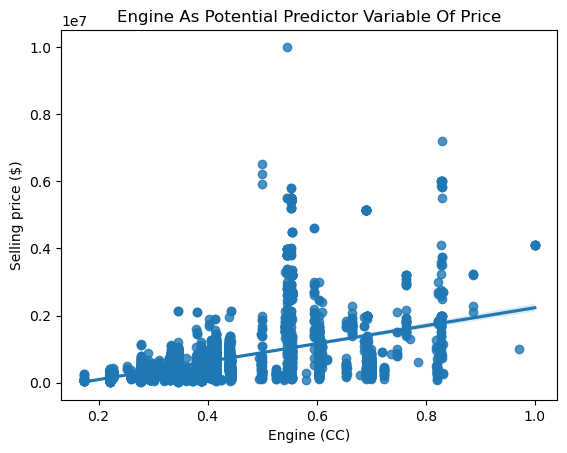

In [257]:
# engine as potential predictor variable of price
sns.regplot(x='engine_CC', y='selling_price', data=df)

#Set labels
plt.xlabel('Engine (CC)')
plt.ylabel('Selling price ($)')
plt.title('Engine As Potential Predictor Variable Of Price')

In [258]:
#show correlation between engine and selling_price
df[['engine_CC', 'selling_price']].corr()

,engine_CC,selling_price
engine_CC,1.000000,0.458345
selling_price,0.458345,1.000000


Text(0.5, 1.0, 'Maximum Power As Potential Predictor Variable Of Price')

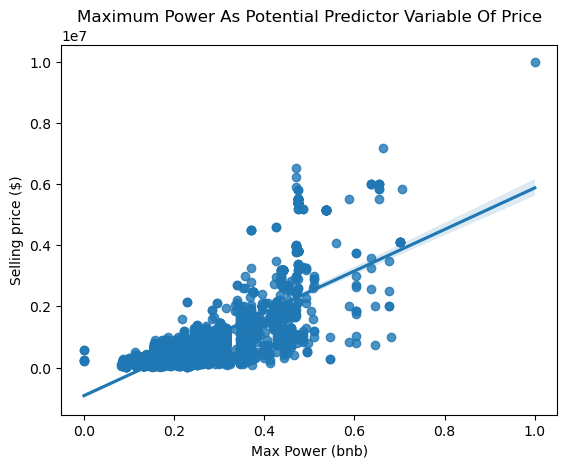

In [259]:
# Maximum Power as potential predictor variable of price
sns.regplot(x='max_power_bnb', y='selling_price', data=df)

#Set labels
plt.xlabel('Max Power (bnb)')
plt.ylabel('Selling price ($)')
plt.title('Maximum Power As Potential Predictor Variable Of Price')

In [260]:
#show correlation between max power and selling price
df[['max_power_bnb', 'selling_price']].corr()

,max_power_bnb,selling_price
max_power_bnb,1.000000,0.744958
selling_price,0.744958,1.000000


Text(0.5, 1.0, 'Mileage As Potential Predictor Variable Of Price')

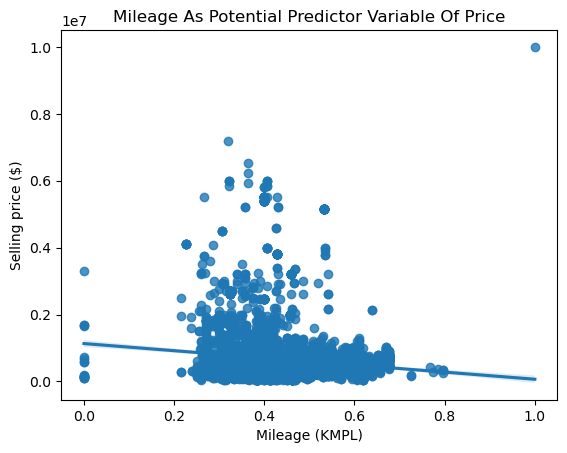

In [261]:
# Maximum Power as potential predictor variable of price
sns.regplot(x='mileage_Kmpl', y='selling_price', data=df)

#Set labels
plt.xlabel('Mileage (KMPL)')
plt.ylabel('Selling price ($)')
plt.title('Mileage As Potential Predictor Variable Of Price')

In [262]:
#show corrolation between mileage (KMMPL) and selling price
df[['mileage_Kmpl', 'selling_price']].corr()

,mileage_Kmpl,selling_price
mileage_Kmpl,1.000000,-0.125454
selling_price,-0.125454,1.000000


Text(0.5, 1.0, 'Seats As Potential Predictor Variable Of Price')

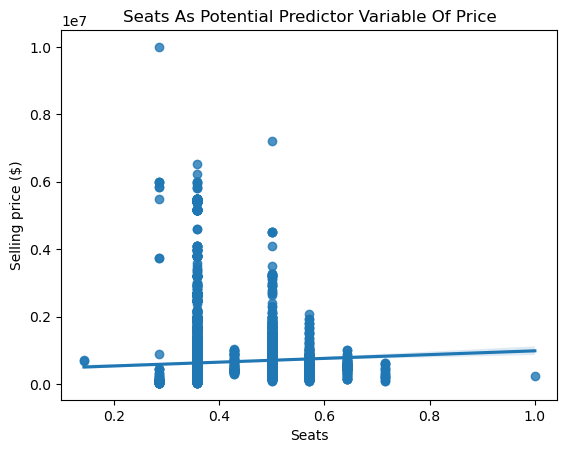

In [263]:
# Seats as potential predictor variable of price
sns.regplot(x='seats', y='selling_price', data=df)

#Set labels
plt.xlabel('Seats')
plt.ylabel('Selling price ($)')
plt.title('Seats As Potential Predictor Variable Of Price')

In [264]:
#calculate the correlation between seats and selling_price
df[["seats", 'selling_price']].corr()

,seats,selling_price
seats,1.000000,0.047135
selling_price,0.047135,1.000000


Text(0.5, 1.0, 'Year As Potential Predictor Variable Of Price')

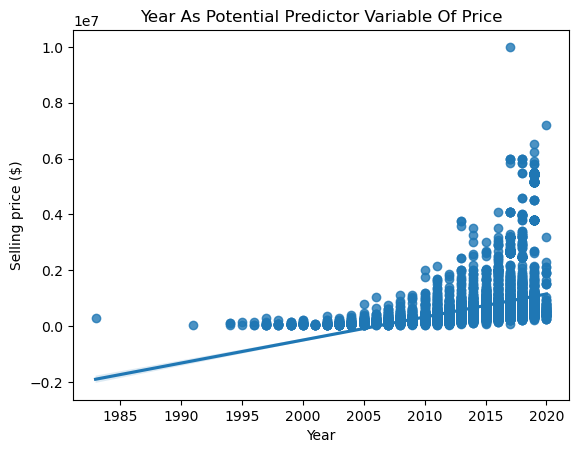

In [265]:
# Seats as potential predictor variable of price
sns.regplot(x='year', y='selling_price', data=df)

#Set labels
plt.xlabel('Year')
plt.ylabel('Selling price ($)')
plt.title('Year As Potential Predictor Variable Of Price')

In [266]:
#calculate correlation between years and selling price
df[["year", 'selling_price']].corr()

,year,selling_price
year,1.000000,0.414092
selling_price,0.414092,1.000000


Text(0.5, 1.0, 'Owner As Potential Predictor Variable Of Price')

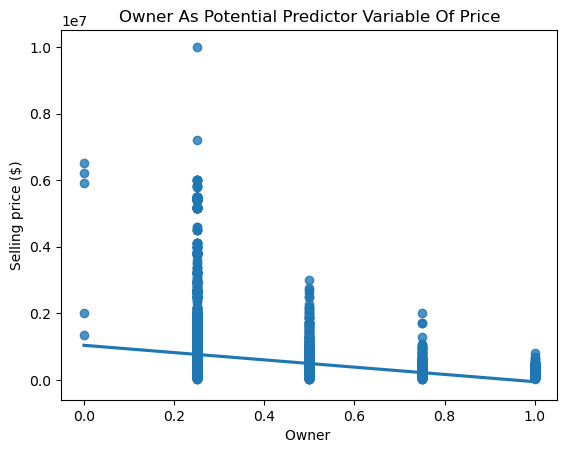

In [267]:
# Maximum Power as potential predictor variable of price
sns.regplot(x='owner', y='selling_price', data=df)

#Set labels
plt.xlabel('Owner ')
plt.ylabel('Selling price ($)')
plt.title('Owner As Potential Predictor Variable Of Price')

In [268]:
#calculate correlation between owner and selling price
df[["owner", 'selling_price']].corr()

,owner,selling_price
owner,1.000000,-0.243316
selling_price,-0.243316,1.000000


Text(0.5, 1.0, 'Km Driven As Potential Predictor Variable Of Price')

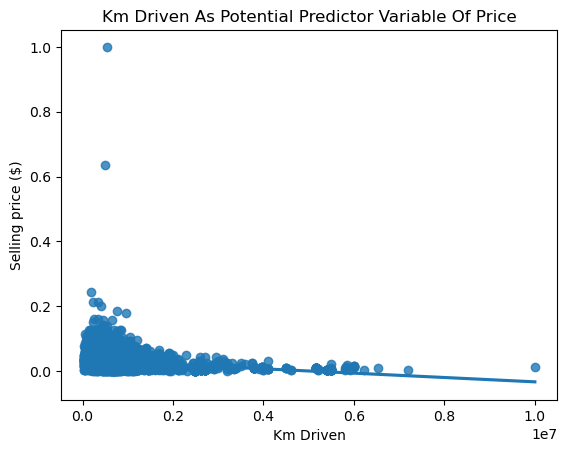

In [269]:
# Seats as potential predictor variable of price
sns.regplot(x='selling_price', y='km_driven', data=df)

#Set labels
plt.xlabel('Km Driven')
plt.ylabel('Selling price ($)')
plt.title('Km Driven As Potential Predictor Variable Of Price')

In [270]:
# calculate correlation between km_driven and selling_price
df[['selling_price', "km_driven"]].corr()

,selling_price,km_driven
selling_price,1.000000,-0.225534
km_driven,-0.225534,1.000000


### Categorical Variable

Text(0.5, 1.0, 'Fuel As Potential Predictor Variable Of Price')

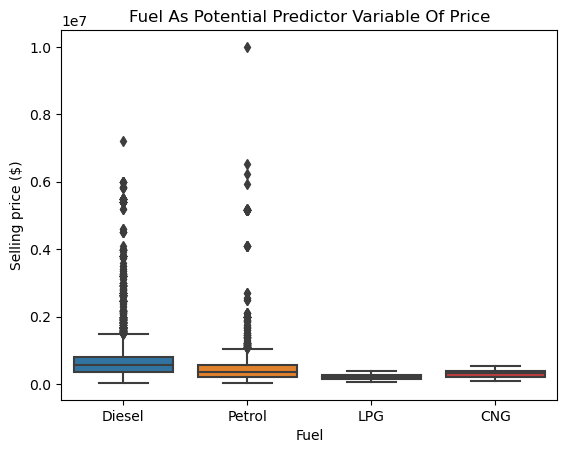

In [271]:
sns.boxplot(x='fuel', y='selling_price', data=df)

#Set labels
plt.xlabel('Fuel')
plt.ylabel('Selling price ($)')
plt.title('Fuel As Potential Predictor Variable Of Price')

Text(0.5, 1.0, 'Seller Type As Potential Predictor Variable Of Price')

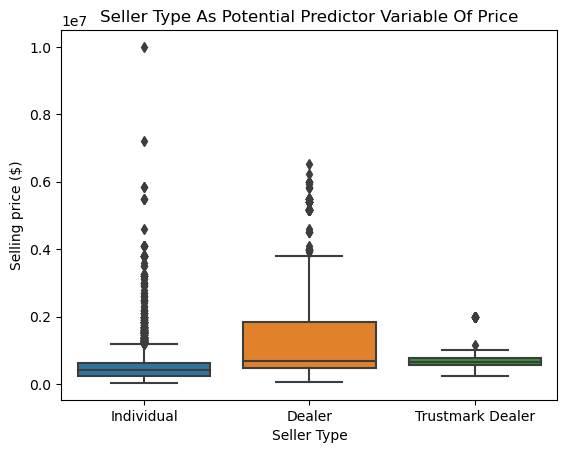

In [272]:
sns.boxplot(x='seller_type', y='selling_price', data=df)

#Set labels
plt.xlabel('Seller Type')
plt.ylabel('Selling price ($)')
plt.title('Seller Type As Potential Predictor Variable Of Price')

Text(0.5, 1.0, 'Seller Type As Potential Predictor Variable Of Price')

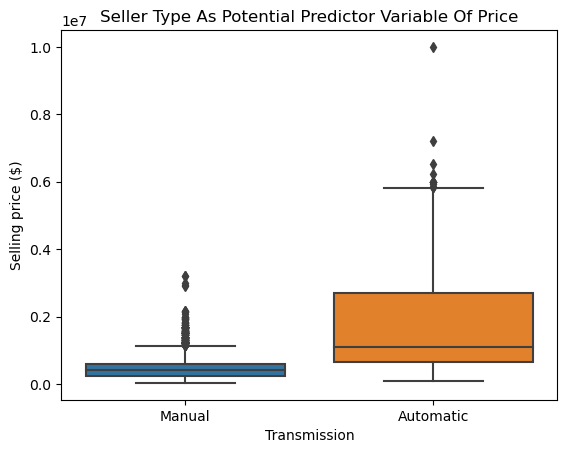

In [273]:
sns.boxplot(x='transmission', y='selling_price', data=df)

#Set labels
plt.xlabel('Transmission')
plt.ylabel('Selling price ($)')
plt.title('Seller Type As Potential Predictor Variable Of Price')

## Descriptive Statistical Analysis

In [274]:
# Descriptive Statistical Analysis for numerical values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1.983000e+03,2011.000000,2015.000000,2017.000000,2020.0
selling_price,8128.0,638271.807702,806253.403508,2.999900e+04,254999.000000,450000.000000,675000.000000,10000000.0
km_driven,8128.0,0.029579,0.023957,4.236468e-07,0.014828,0.025419,0.041517,1.0
owner,8128.0,0.364788,0.179345,0.000000e+00,0.250000,0.250000,0.500000,1.0
seats,8128.0,0.386099,0.067777,1.428571e-01,0.357143,0.357143,0.357143,1.0
engine_CC,8128.0,0.403135,0.138234,1.731410e-01,0.332131,0.346282,0.438957,1.0
mileage_Kmpl,8128.0,0.462352,0.094807,0.000000e+00,0.400000,0.462352,0.530417,1.0
max_power_bnb,8128.0,0.228795,0.088358,0.000000e+00,0.170250,0.207750,0.253125,1.0


In [275]:
# Descriptive Statistical Analysis for categorical values 
df.describe(include=['object']).T

,count,unique,top,freq
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078


In [276]:
Group_fuel = df['fuel'].value_counts().to_frame(name = 'value_counts')
Group_fuel.index.name ='Fuel'
Group_fuel

,value_counts
Fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [277]:
# group based on seller_type
group_seller_type=df.seller_type.value_counts().to_frame(name = 'value_counts')

#name index
group_seller_type.index.name ='Fuel'

# print
group_seller_type

,value_counts
Fuel,
Individual,6766
Dealer,1126
Trustmark Dealer,236


Text(0.5, 1.0, 'Avg. Of Price Based on Type Of Fuel')

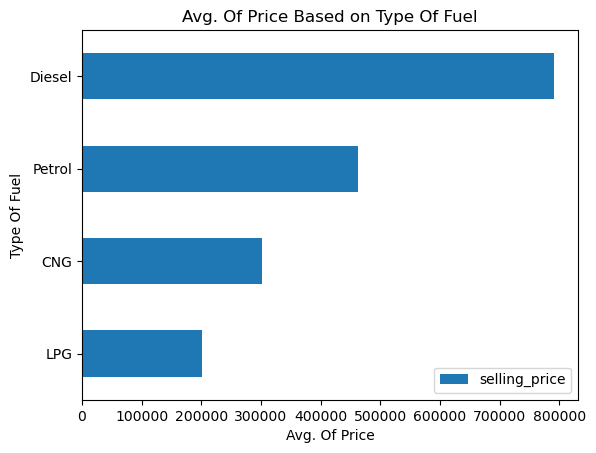

In [278]:
pd.DataFrame(df.groupby(['fuel'])['selling_price'].mean()).sort_values(by='selling_price',ascending=True).plot(kind='barh')
plt.xlabel('Avg. Of Price')
plt.ylabel('Type Of Fuel')
plt.title('Avg. Of Price Based on Type Of Fuel')

Text(0.5, 1.0, 'Avg. Of Price Based On Seller Type')

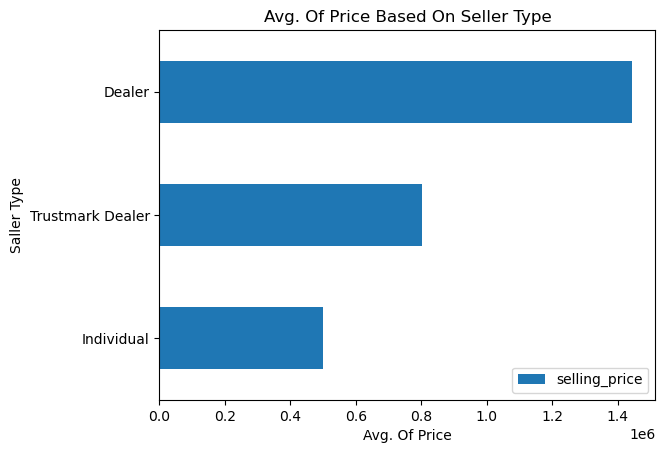

In [279]:
pd.DataFrame(df.groupby(['seller_type'])['selling_price'].mean()).sort_values(by='selling_price',ascending=True).plot(kind='barh')
plt.xlabel('Avg. Of Price')
plt.ylabel('Saller Type')
plt.title('Avg. Of Price Based On Seller Type')

Text(0.5, 1.0, 'Price Based on Type Of Transmission')

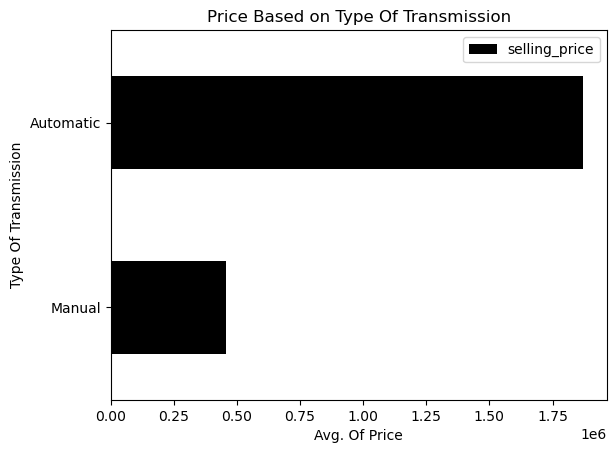

In [280]:
pd.DataFrame(df.groupby(['transmission'])['selling_price'].mean()).sort_values(by='selling_price',ascending=True).plot(kind='barh', color = 'black')
plt.xlabel('Avg. Of Price')
plt.ylabel('Type Of Transmission')
plt.title('Price Based on Type Of Transmission')

<Axes: xlabel='seller_type', ylabel='selling_price'>

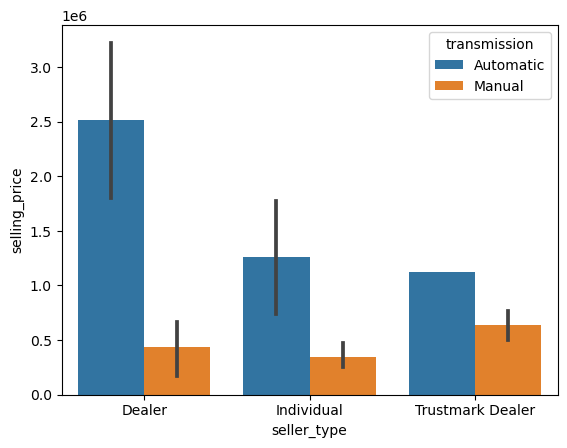

In [281]:
# grouping results
grouped = pd.DataFrame(df.groupby(['seller_type', 'transmission', 'fuel'],as_index=False)['selling_price'].mean())
sns.barplot(x='seller_type', y='selling_price',hue='transmission' ,data=grouped)

<Axes: xlabel='fuel', ylabel='selling_price'>

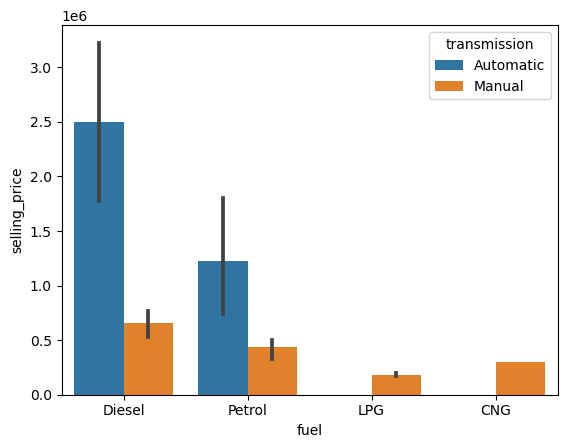

In [282]:
sns.barplot(x='fuel', y='selling_price',hue='transmission' ,data=grouped)

## Causation

### year vs Price

In [283]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'year' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['year'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is 0.41409186055715097 with a P-value of P = 0.0


### Owner VS Selling Price 

In [284]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'owenr' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['owner'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is -0.24331626252537558 with a P-value of P = 7.486505897399036e-110


### Km Driven Vs Selling Price

In [285]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'km_driven' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['km_driven'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is -0.22553375557218944 with a P-value of P = 2.988960331649652e-94


### Maximum Power (bnb) Vs Selling Price

In [286]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'max_power_bnb' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['max_power_bnb'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is 0.7449581962374776 with a P-value of P = 0.0


### Engine (CC) Vs Selling Price

In [287]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'engine_CC' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['engine_CC'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is 0.4583447725283302 with a P-value of P = 0.0


### Seats Vs Selling Price

In [288]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'seats' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['seats'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is 0.04713456628078849 with a P-value of P = 2.126796222493106e-05


### mileage_Kmpl Vs Selling Price

In [289]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'mileage_Kmpl' and 'selling_price'.

pearson_coef, p_value = stats.pearsonr(df['mileage_Kmpl'], df['selling_price'])
print("The Pearson Correlation Coefficient is {} with a P-value of P = {}".format(pearson_coef, p_value))  

The Pearson Correlation Coefficient is -0.1254539842428977 with a P-value of P = 7.125480555837441e-30


# ANOVA

In [290]:
#group_transmation  = pd.DataFrame(df3.groupby(['transmission', 'fuel'], as_index = False)['selling_price'].mean())
#group_transmation.index.names = ['transmission', 'fuel']
#group_transmation.columns = ['price']

In [291]:
#preper data to ANOVA
group= df[['transmission', 'fuel', 'selling_price']]
group1 = group.groupby(['transmission', 'fuel'],as_index=False).mean()
group2 = group[['fuel','selling_price']].groupby(['fuel'])

In [292]:
group2.get_group('Petrol')['selling_price']

2       158000
4       130000
5       440000
7        45000
11       92000
         ...  
8118    380000
8119    360000
8120    120000
8121    260000
8123    320000
Name: selling_price, Length: 3631, dtype: int64

In [293]:
# ANOVA
f_val, p_val = stats.f_oneway(group2.get_group('Petrol')['selling_price'], group2.get_group('Diesel')['selling_price'], group2.get_group('CNG')['selling_price'], group2.get_group('LPG')['selling_price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 122.88062883888716 , P = 7.768067697277526e-78


###### Separately Two goups Petrol, Diesel

In [294]:
# ANOVA
f_val, p_val = stats.f_oneway(group2.get_group('Petrol')['selling_price'], group2.get_group('Diesel')['selling_price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 342.352595763539 , P = 6.957773203366255e-75


###### Separately Two goups CNG, LPG

In [295]:
f_val, p_val = stats.f_oneway( group2.get_group('CNG')['selling_price'], group2.get_group('LPG')['selling_price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 22.257506776219568 , P = 8.376845574671528e-06


Two subgroup of transmission(CNG, LPG) with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance but less than other Petrol, Diesel

## Conclusion: Important Variables



#### 1- Continuous numerical variables
* year
* selling_price	
* km_driven
* owner	seats
* engine_CC
* mileage_Kmpl
* max_power_bnb

#### 2- Categorical variables:

* Fuel 
* transmission

### Model Development 


**Some questions we want to ask in this module**
1. Do I know if the dealer is offering fair value for my trade-in?
2. Do I know if I put a fair value on my car?



Data Analytics, we often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.


# Creating Dummies Variable

In [296]:
#convert categorical values
df = pd.get_dummies(df, columns=['transmission'], drop_first=True)
print(df)

      year  selling_price  km_driven    fuel seller_type  owner     seats  \
0     2014         450000   0.061641  Diesel  Individual   0.25  0.357143   
1     2014         370000   0.050838  Diesel  Individual   0.50  0.357143   
2     2006         158000   0.059311  Petrol  Individual   0.75  0.357143   
3     2010         225000   0.053803  Diesel  Individual   0.25  0.357143   
4     2007         130000   0.050838  Petrol  Individual   0.25  0.357143   
...    ...            ...        ...     ...         ...    ...       ...   
8123  2013         320000   0.046601  Petrol  Individual   0.25  0.357143   
8124  2007         135000   0.050414  Diesel  Individual   1.00  0.357143   
8125  2009         382000   0.050838  Diesel  Individual   0.25  0.357143   
8126  2013         290000   0.010591  Diesel  Individual   0.25  0.357143   
8127  2013         290000   0.010591  Diesel  Individual   0.25  0.357143   

      engine_CC  mileage_Kmpl  max_power_bnb max_power_binned  \
0      0.3

## Develop prediction models
### 1- Using Linear Regression

In [297]:
# separate data to features and target
X = df[['max_power_bnb']]
y = df[['selling_price']]

In [298]:
#split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.4, 
                                   shuffle=True)

In [299]:
# create model and fit train data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [300]:
 #show intercept of equation
reg.intercept_

array([-894752.33893687])

In [301]:
#show coefficient of equation
reg.coef_

array([[6701474.89634685]])

In [302]:
#show score of model on train data
reg.score(X_train, y_train)

0.5414896258926738

In [303]:
Y_hat = reg.predict(X_test)
Y_hat[:3]

array([[ 780616.38514984],
       [1418931.86902688],
       [ 344015.29565285]])

### Prediction Model

In [304]:
Y_hat = reg.predict(X_test)

### Evaluate Model

In [305]:
# calculate MSE 
mean_squared_error( y_test, Y_hat)

292598853724.45593

# Use Multiple Linear Regression

In [306]:
# separate data to features and target
X = df[['year', 'max_power_bnb', 'engine_CC','transmission_Manual']]
y = df[['selling_price']]

In [307]:
#split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.4, 
                                   shuffle=True)

In [308]:
# create model and fit train data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [309]:
 #show intercept of equation
reg.intercept_

array([-92958243.9314307])

In [310]:
#show coefficient of equation
reg.coef_

array([[  46148.08016691, 5283321.06707051, -178294.81531198,
        -542965.16034444]])

In [311]:
#show score of model on train data
reg.score(X_train, y_train)

0.6484636261684701

In [312]:
Y_hat = reg.predict(X_test)
Y_hat[:3]

array([[ 226513.074974  ],
       [1157292.84887429],
       [ 448202.15495995]])

In [313]:
#show score of fitting data to model
#reg.score(y_test, Y_hat)

### Prediction of MLR Model

In [314]:
#predict selling price 
Y_hat = reg.predict(X_test)

### Evaluate Model 

In [315]:
# calculate MSE 
mean_squared_error( y_test, Y_hat)

226614759251.57333

C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_7512\4065401461.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['selling_price'], hist=False, color="r", label="Actual Value")
C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_7512\4065401461.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

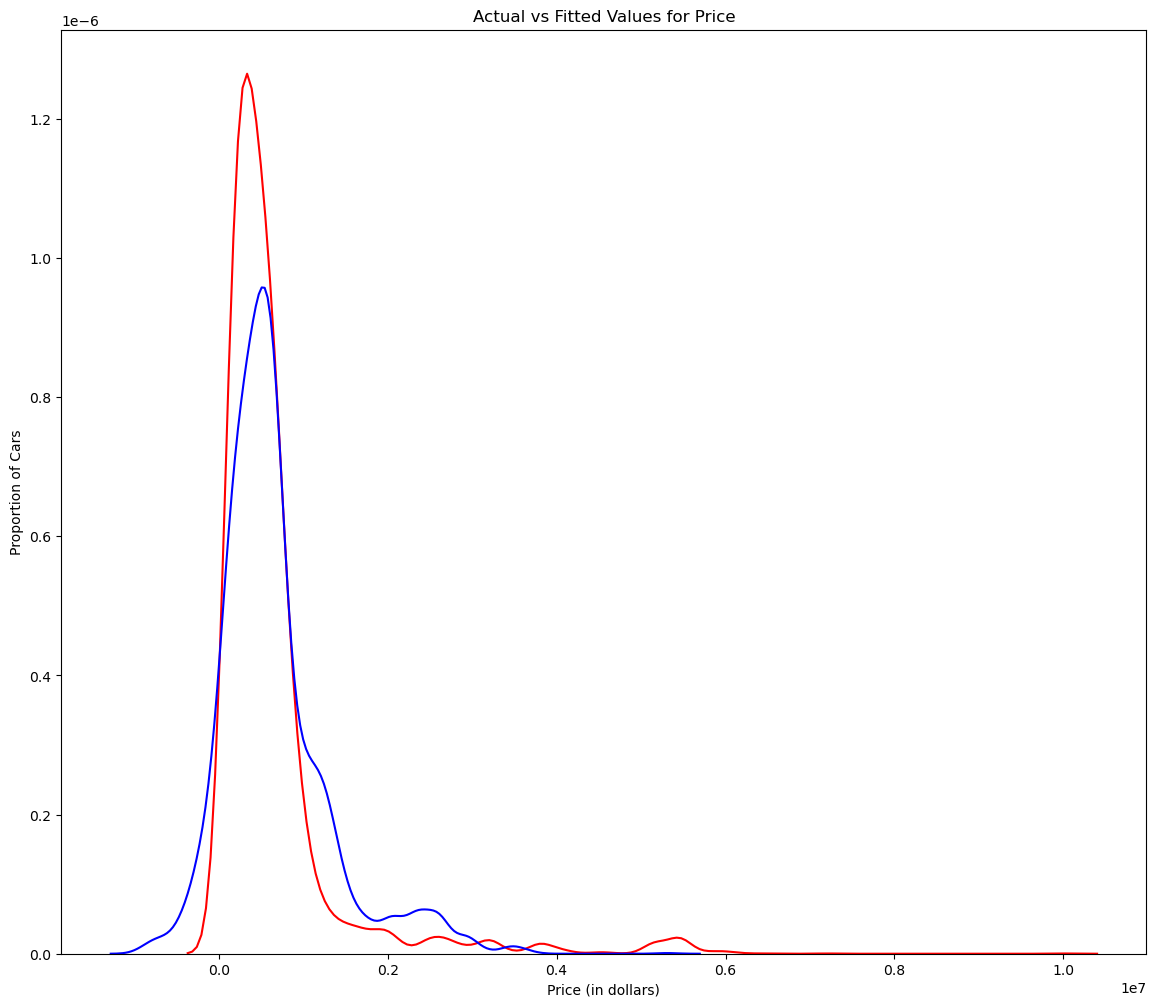

In [316]:
width = 14
height = 12
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['selling_price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Use Polynomial Regression and Pipelines

In [317]:
# we create a ploy feature of degree 4
p_features = PolynomialFeatures(degree=4)
p_features

PolynomialFeatures(degree=4)

In [318]:
# transform features
p_train=p_features.fit_transform(X_train)

In [319]:
# shape of data before create polynomial feature
X_train.shape

(4876, 4)

In [320]:
# shape of data after create polynomial feature
p_train.shape

(4876, 70)

In [321]:
x = df['max_power_bnb']
y = df['selling_price']
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

           2
1.596e+07 x - 2.82e+06 x + 3.237e+05


In [322]:
# calculate R-square
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6329551972845805


In [323]:
#calculate Mean Squared Error
mean_squared_error(df['selling_price'], p(x))

238566119098.2902

In [324]:
# create 
def PlotPolly(model, ind_var, dep_var, degree):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Selling Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(degree)
    plt.ylabel('Selling Price')

    plt.show()
    plt.close()

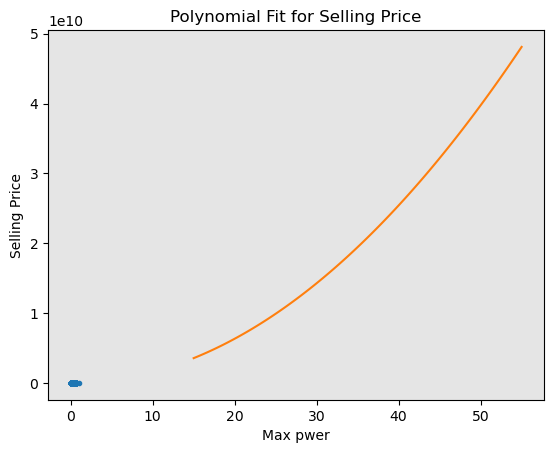

In [325]:
PlotPolly(p, x, y, 'Max pwer')

In [326]:
Input=([('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())])

In [327]:
pipe=Pipeline(Input,verbose=True)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())],
         verbose=True)

In [328]:
pipe.fit(X_train,y_train)

[Pipeline] ............. (step 1 of 3) Processing scale, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing polynomial, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())],
         verbose=True)

In [329]:
ypipe=pipe.predict(X_test)
ypipe[0:4]

array([[-74779.5],
       [846328. ],
       [454855.5],
       [ 22163.5]])

### Decision Making




<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Max Power as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.5414896258926741</li>
    <li>MSE: 292598853724.4558</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using 'year', 'max_power_bnb', 'engine_CC' and 'transmission_Manual' as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.6484636261684696 </li>
    <li>MSE: 226614759251.57318</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Max Power as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6329551972845806</li>
    <li>MSE: 238566119098.2901</li>
</ul>
</p>


## Conclusion

Comparing these three models, we conclude that the Polynomial model is the best model to be able to predict price from our dataset, and we know that more than one of those variables are potential predictors of the final car price.